# Authors: 
         Rutvik Pansare       
         Praksha maheshwari
         Vishal Phaugat

In [ ]:

        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
# connection with database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="rutu12345",
  database="project"
)
# Query to extract data from the database
query = "SELECT * FROM project.crime_data;"
df = pd.read_sql(query,mydb)

mydb.close() #close the connection


df.head()

# convert date string to datetime format
from datetime import datetime
year_query = df.copy()
dates =[]
year_query['CMPLNT_FR_DT'] = pd.to_datetime(year_query['CMPLNT_FR_DT'])
year_query['YEAR'] = pd. DatetimeIndex(year_query['CMPLNT_FR_DT']).year

In [3]:
# convert date string to datetime format
from datetime import datetime
year_query = df.copy()
dates =[]
year_query['CMPLNT_FR_DT'] = pd.to_datetime(year_query['CMPLNT_FR_DT'])
year_query['YEAR'] = pd. DatetimeIndex(year_query['CMPLNT_FR_DT']).year

In [4]:
df =pd.read_csv("clean.csv")

In [5]:
df.head()

,Unnamed: 0,CMPLNT_FR_DT,CMPLNT_FR_TM,SUSP_AGE_GROUP,Latitude,Longitude,YEAR,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,...,SYNAGOGUE,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION
0,0,2,18,0,40.576238,-73.959504,2012,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,1,0,2,40.858249,-73.902349,2016,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,2,1,17,0,40.804013,-73.878332,2010,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,3,11,20,2,40.675311,-73.966614,2017,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,4,7,14,1,40.654621,-73.952894,2015,1,0,1,...,0,0,0,1,0,0,0,0,1,0


In [6]:
df.columns

Index(['Unnamed: 0', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'SUSP_AGE_GROUP',
       'Latitude', 'Longitude', 'YEAR', 'SUS_F', 'SUS_M',
       'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE',
       'WHITE HISPANIC', 'ABANDONED BUILDING', 'AIRPORT TERMINAL', 'ATM',
       'BANK', 'BAR/NIGHT CLUB', 'BEAUTY & NAIL SALON', 'BOOK/CARD', 'BRIDGE',
       'BUS (NYC TRANSIT)', 'BUS (OTHER)', 'BUS STOP', 'BUS TERMINAL',
       'CANDY STORE', 'CEMETERY', 'CHAIN STORE', 'CHECK CASHING BUSINESS',
       'CHURCH', 'CLOTHING/BOUTIQUE', 'COMMERCIAL BUILDING',
       'CONSTRUCTION SITE', 'DAYCARE FACILITY', 'DEPARTMENT STORE',
       'DOCTOR/DENTIST OFFICE', 'DRUG STORE', 'DRY CLEANER/LAUNDRY',
       'FACTORY/WAREHOUSE', 'FAST FOOD', 'FERRY/FERRY TERMINAL',
       'FOOD SUPERMARKET', 'GAS STATION', 'GROCERY/BODEGA',
       'GYM/FITNESS FACILITY', 'HIGHWAY/PARKWAY', 'HOMELESS SHELTER',
       'HOSPITAL', 'HOTEL/MOTEL', 'JEWELRY', 'LIQUOR STORE', 'LOAN COMPANY',
       'MAILBOX INSIDE', 'MAILB

In [7]:
df1 = df[['FELONY','MISDEMEANOR', 'VIOLATION','Latitude', 'Longitude']]
df1.head()

,FELONY,MISDEMEANOR,VIOLATION,Latitude,Longitude
0,0,1,0,40.576238,-73.959504
1,0,1,0,40.858249,-73.902349
2,0,1,0,40.804013,-73.878332
3,0,1,0,40.675311,-73.966614
4,0,1,0,40.654621,-73.952894


Text(0, 0.5, 'Longitude')

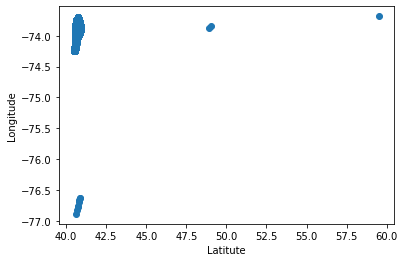

In [8]:
plt.scatter(df1.Latitude,df1.Longitude)
plt.xlabel('Latitute')
plt.ylabel('Longitude')

ModuleNotFoundError: No module named 'geopandas'

In [10]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df1[['Latitude','Longitude']])
y_predicted

array([1, 0, 0, ..., 2, 1, 1], dtype=int32)

In [11]:
df1['cluster']=y_predicted
df1.head()

<ipython-input-11-eb9581073073>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster']=y_predicted


,FELONY,MISDEMEANOR,VIOLATION,Latitude,Longitude,cluster
0,0,1,0,40.576238,-73.959504,1
1,0,1,0,40.858249,-73.902349,0
2,0,1,0,40.804013,-73.878332,0
3,0,1,0,40.675311,-73.966614,1
4,0,1,0,40.654621,-73.952894,1


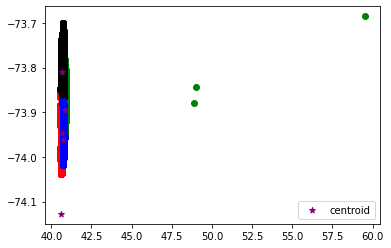

In [12]:
df2 = df1[df1.cluster==0]
df3 = df1[df1.cluster==1]
df4 = df1[df1.cluster==2]
df5 = df1[df1.cluster==3]

plt.scatter(df2.Latitude,df2.Longitude,color='green')
plt.scatter(df3.Latitude,df3.Longitude,color='red')
plt.scatter(df4.Latitude,df4.Longitude,color='black')
plt.scatter(df5.Latitude,df5.Longitude,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [13]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['Latitude','Longitude']])
    sse.append(km.inertia_)

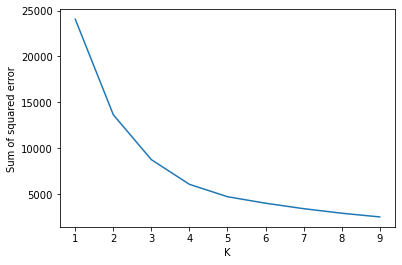

In [14]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df1[['FELONY','MISDEMEANOR', 'VIOLATION']])
y_predicted

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

In [16]:
df1['cluster']=y_predicted
df1.head()

<ipython-input-16-eb9581073073>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster']=y_predicted


,FELONY,MISDEMEANOR,VIOLATION,Latitude,Longitude,cluster
0,0,1,0,40.576238,-73.959504,1
1,0,1,0,40.858249,-73.902349,1
2,0,1,0,40.804013,-73.878332,1
3,0,1,0,40.675311,-73.966614,1
4,0,1,0,40.654621,-73.952894,1


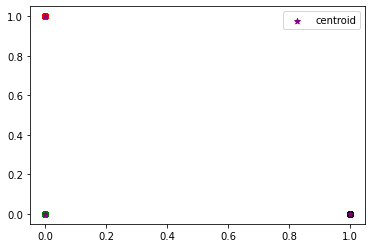

In [17]:
df2 = df1[df1.cluster==0]
df3 = df1[df1.cluster==1]
df4 = df1[df1.cluster==2]


plt.scatter(df2.FELONY,df2.MISDEMEANOR,color='green')
plt.scatter(df3.FELONY,df3.MISDEMEANOR,color='red')
plt.scatter(df4.FELONY,df4.MISDEMEANOR,color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [18]:
df1['Dates']= year_query.CMPLNT_FR_DT

<ipython-input-18-17192885fe0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dates']= year_query.CMPLNT_FR_DT


In [23]:
vis2 = df.groupby(["CMPLNT_FR_DT"])['Unnamed: 0'].count().reset_index()

In [30]:
year_query.OFNS_DESC.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [29]:
year_query.head().head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,X_COORD_CD,...,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,100000228,2012-02-08,0 days 18:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,995500.0,...,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,"(40.576237762, -73.959504022)",45-64,WHITE,F,2012
1,100000272,2016-01-31,0 days 00:40:00,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,BRONX,BAR/NIGHT CLUB,N.Y. POLICE DEPT,1011263.0,...,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,"(40.858249408, -73.902348526)",UNKNOWN,UNKNOWN,E,2016
2,100000480,2010-01-26,0 days 17:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BRONX,STREET,N.Y. POLICE DEPT,1017934.0,...,18-24,WHITE,M,40.804012949000004,-73.878331833,"(40.804012949, -73.878331833)",18-24,WHITE HISPANIC,M,2010
3,100000495,2017-11-24,0 days 20:10:00,DANGEROUS DRUGS,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,N.Y. POLICE DEPT,993511.0,...,45-64,BLACK,M,40.675310519,-73.96661445,"(40.675310519, -73.96661445)",UNKNOWN,UNKNOWN,E,2017
4,100000926,2015-07-12,0 days 14:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,DRY CLEANER/LAUNDRY,N.Y. POLICE DEPT,997321.0,...,25-44,BLACK,F,40.654621066,-73.952893562,"(40.654621066, -73.952893562)",25-44,ASIAN / PACIFIC ISLANDER,M,2015


In [39]:
year_query.OFNS_DESC.value_counts().sort_values(ascending=False).head(10)

HARRASSMENT 2                     423463
ASSAULT 3 & RELATED OFFENSES      288505
OFF. AGNST PUB ORD SENSBLTY &     154767
PETIT LARCENY                     143061
FELONY ASSAULT                     94840
CRIMINAL MISCHIEF & RELATED OF     86796
MISCELLANEOUS PENAL LAW            83260
DANGEROUS DRUGS                    81444
OFFENSES AGAINST PUBLIC ADMINI     63477
ROBBERY                            46323
Name: OFNS_DESC, dtype: int64

In [41]:
vis2 = year_query.groupby(["CMPLNT_FR_DT",'OFNS_DESC']).count().reset_index()

In [42]:
vis2

,CMPLNT_FR_DT,OFNS_DESC,CMPLNT_NUM,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,X_COORD_CD,...,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,2006-01-01,ADMINISTRATIVE CODE,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2006-01-01,ASSAULT 3 & RELATED OFFENSES,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
2,2006-01-01,CRIMINAL MISCHIEF & RELATED OF,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
3,2006-01-01,DANGEROUS WEAPONS,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,2006-01-01,FELONY ASSAULT,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114249,2019-12-31,RAPE,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
114250,2019-12-31,ROBBERY,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
114251,2019-12-31,SEX CRIMES,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
114252,2019-12-31,THEFT-FRAUD,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
